In [1]:
from io import BytesIO

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2
import IPython.display

In [2]:
MIN_CONTOUR_AREA = 100

RESIZED_IMAGE_WIDTH = 20
RESIZED_IMAGE_HEIGHT = 30

In [3]:
def showimage(cimg):
    if len(cimg.shape) == 2:
        img = Image.fromarray(cimg)
    else:
        img = Image.fromarray(cv2.cvtColor(cimg, cv2.COLOR_BGR2RGB))
    b = BytesIO()
    img.save(b, format='png')

    IPython.display.display(IPython.display.Image(data=b.getvalue(), format='png', embed=True))

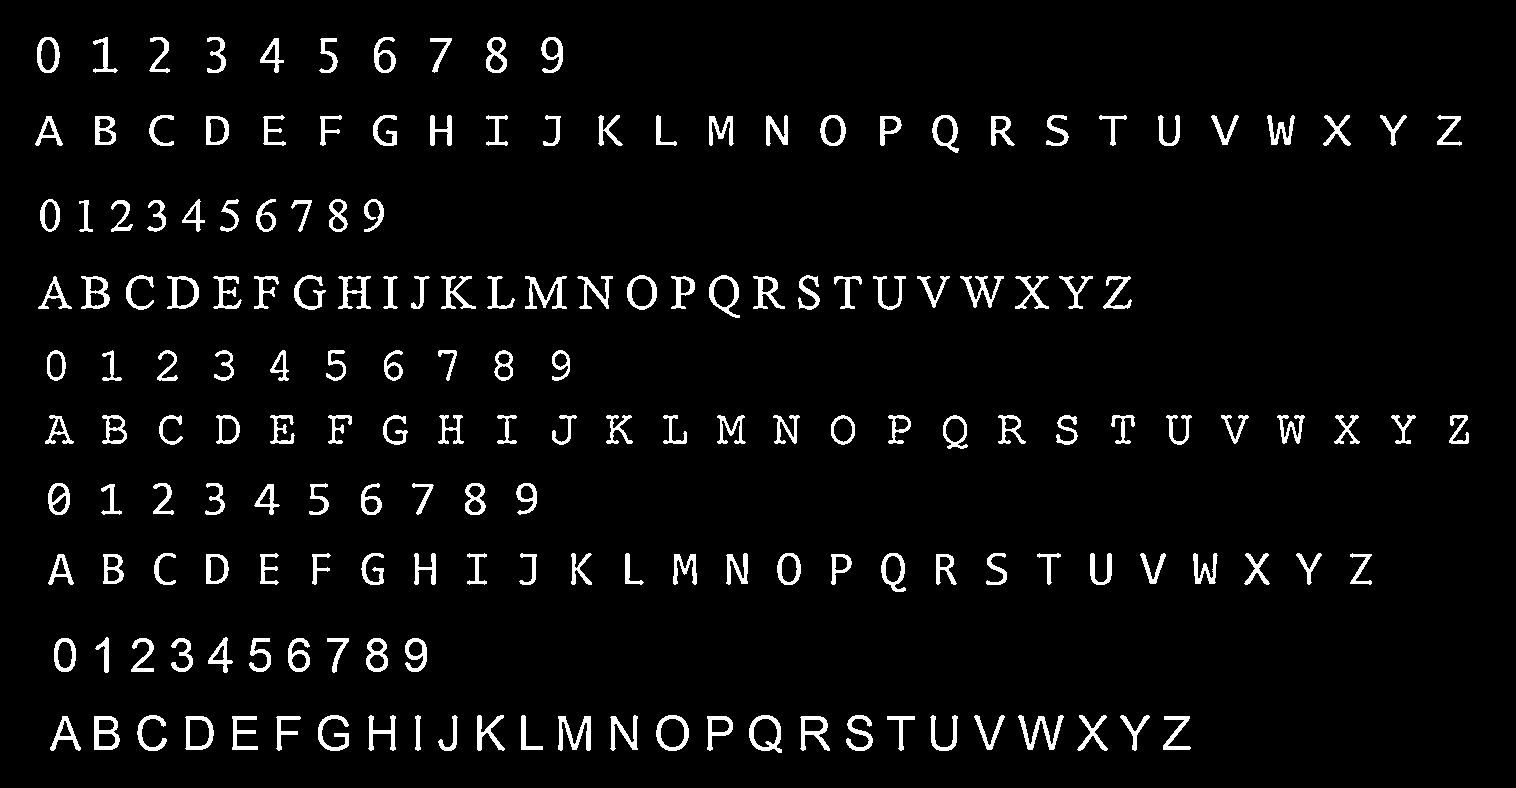

In [7]:
# Read training data
imgTrainingNumbers = cv2.imread("training_chars.png")

imgGray = cv2.cvtColor(imgTrainingNumbers, cv2.COLOR_BGR2GRAY)
imgBlurred = cv2.GaussianBlur(imgGray, (5,5), 0)

imgThresh = cv2.adaptiveThreshold(imgBlurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

showimage(imgThresh)

In [ ]:
imgThreshCopy = imgThresh.copy()

imgContours, npaContours, npaHierarchy = cv2.findContours(imgThresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

npaFlattenedImages =  np.empty((0, RESIZED_IMAGE_WIDTH * RESIZED_IMAGE_HEIGHT))

intClassifications = []
